
Nodes:  ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Edges:  [('A', 'B', 0), ('A', 'G', 0), ('B', 'C', 0), ('B', 'G', 0), ('C', 'D', 0), ('C', 'F', 0), ('D', 'E', 0), ('E', 'F', 0), ('F', 'G', 0)]


KeyError: ('A', 'B', 0)

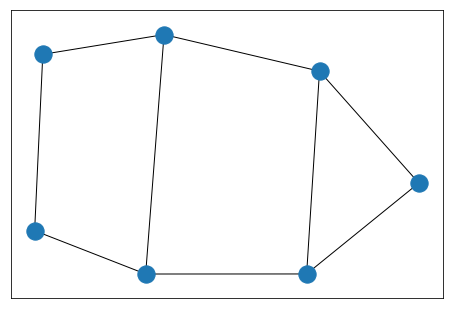

In [141]:
# following: https://networkx.github.io/documentation/stable/tutorial.html

import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import pylab

# G = nx.petersen_graph()
# G = nx.tutte_graph()
# G = nx.sedgewick_maze_graph() # varrying number of edges
# G = nx.tetrahedral_graph()

# G = nx.petersen_graph()
# for item in (dir(G)):
#     if item[0] != "_":
#         print(item)
        
    
G = nx.MultiGraph()

nodes_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

for node in nodes_list:
    G.add_node(node)

# Create base relationships
# G.add_edge('A', 'B', weight = 42)
# G.add_edge('B', 'C') #, 'weight' = 38)
# G.add_edge('C', 'D') #, 'weight' = 70)
# G.add_edge('D', 'E') #, 'weight' = 80)
# G.add_edge('E', 'F') #, 'weight' = 62)
# G.add_edge('F', 'G') #, 'weight' = 40)
# G.add_edge('G', 'A') #, 'weight' = 45)
# G.add_edge('G', 'B') #, 'weight' = 35)
# G.add_edge('C', 'F') #, 'weight' = 28)

G.add_edge('A', 'B', weight=42)
G.add_edge('B', 'C', weight=38)
G.add_edge('C', 'D', weight=70)
G.add_edge('D', 'E', weight=80)
G.add_edge('E', 'F', weight=62)
G.add_edge('F', 'G', weight=40)
G.add_edge('G', 'A', weight=45)
G.add_edge('G', 'B', weight=35)
G.add_edge('C', 'F', weight=28)

pos = nx.spring_layout(G)


print("\nNodes: ", G.nodes)
print("\nEdges: ", G.edges)


# edge_label_dict = {}

# for edge in G.edges:    
#     key = edge[0:2]
#     value = edge[2]
    
#     edge_label_dict[key] = value
    
# print(edge_label_dict)

edge_labels_ = nx.get_edge_attributes(G,'weight')

# plt.subplot(121)
nx.draw(G, pos, labels=edge_labels)
# nx.draw(G, with_labels=True, font_weight='bold', labels = edge_labels)

# nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels_)

# A = nx.to_agraph(G)
# A.add_subgraph()
# A.draw(prog='dot')



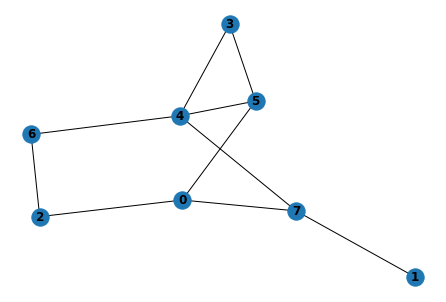

In [82]:
G.add_edge(1,7)

# plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

In [69]:
# 1. List all odd vertices.


# make a dict and set all keys to be a node 
count_edges_dict = dict.fromkeys(G.nodes, 0)

# count how many times each node shows up in an edge 
for edge in G.edges:
    
    # increament node count in dict 
    for node in edge:
        
        count_edges_dict[node] = count_edges_dict[node] + 1
        
odd_edges_list = []

for node in count_edges_dict:
    
    # find the odd verticies
        
    if count_edges_dict[node] % 2 != 0: 
        print(node, ":", count_edges_dict[node])
        odd_edges_list.append(node)
        
    

0 : 3
1 : 1
5 : 3
7 : 3


In [70]:
# 2. List all possible pairings of odd vertices.

print("odd_edges_list:", odd_edges_list)

# get all combos of the list 

num_odd_edges = len(odd_edges_list)

print("num_odd_edges:", num_odd_edges)

possible_odd_edges = []

i = 0
while i < num_odd_edges:
#     print("\n\ni:", i)
#     print(odd_edges_list[i])
    
    all_other_nodes = odd_edges_list[0:i] + odd_edges_list[i+1:]
    
    for other_node in all_other_nodes:
        # make sure the reverse order of the edge isn't already in the possible_odd_edges list, since it's 
        # an undirected graph
        if ((odd_edges_list[i], other_node) not in possible_odd_edges) and (other_node, odd_edges_list[i]) not in possible_odd_edges:
            possible_odd_edges.append((odd_edges_list[i], other_node))
    
#     print("other nodes:", all_other_nodes)
    
    i = i + 1
         
# print(possible_odd_edges)

# see which combos, or reverse order combos, exist in G.edges 

odd_pairings_options = []

for item in possible_odd_edges:
    if item in G.edges:
        odd_pairings_options.append(item)
        
print("odd_pairings_options: ", odd_pairings_options)
    

odd_edges_list: [0, 1, 5, 7]
num_odd_edges: 4
odd_pairings_options:  [(0, 5), (0, 7), (1, 7)]


In [59]:
# 3. For each pairing find the edges that connect the vertices with the minimum weight.

G_edges_list = list(G.edges)

New_G_edges = G_edges_list + odd_pairings_options

print(G.edges)
print(New_G_edges)

# New_G_nodes = G.nodes()


# print("\nG.edges:", G.edges)
# print("\nNew_G.edges: ",New_G.edges)
# print("\nNew_G.nodes: ", New_G.nodes)


# New_G = nx.sedgewick_maze_graph()
# New_G.add_edges_from(New_G_edges)


[(0, 2), (0, 7), (0, 5), (1, 7), (2, 6), (3, 4), (3, 5), (4, 5), (4, 7), (4, 6)]
[(0, 2), (0, 7), (0, 5), (1, 7), (2, 6), (3, 4), (3, 5), (4, 5), (4, 7), (4, 6), (0, 5), (0, 7), (1, 7)]


In [36]:
# 4. Find the pairings such that the sum of the weights is minimised.


In [ ]:
# 5. On the original graph add the edges that have been found in Step 4.


In [26]:
# 6. The length of an optimal Chinese postman route is the sum of all the edges added to the total found in Step 4.
    

In [ ]:
# 7. Find a route corresponding to this minimum weight.